# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [12]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [7]:
# Carregar os dados
df = pd.read_csv('housing.csv')

# Visualizar as primeiras linhas
print("Primeiras linhas do dataset:")
print(df.head())

# Verificar tipos de dados e valores ausentes
print("\nTipos de dados e valores ausentes:")
print(df.info())

# Verificar valores ausentes especificamente
print("\nTotal de valores ausentes por coluna:")
print(df.isnull().sum())

# Verificar se há colunas não numéricas
print("\nColunas com dados não numéricos:")
print(df.select_dtypes(exclude=['number']).columns)

Primeiras linhas do dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Tipos de dados e valores ausentes:
<class 'pa

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

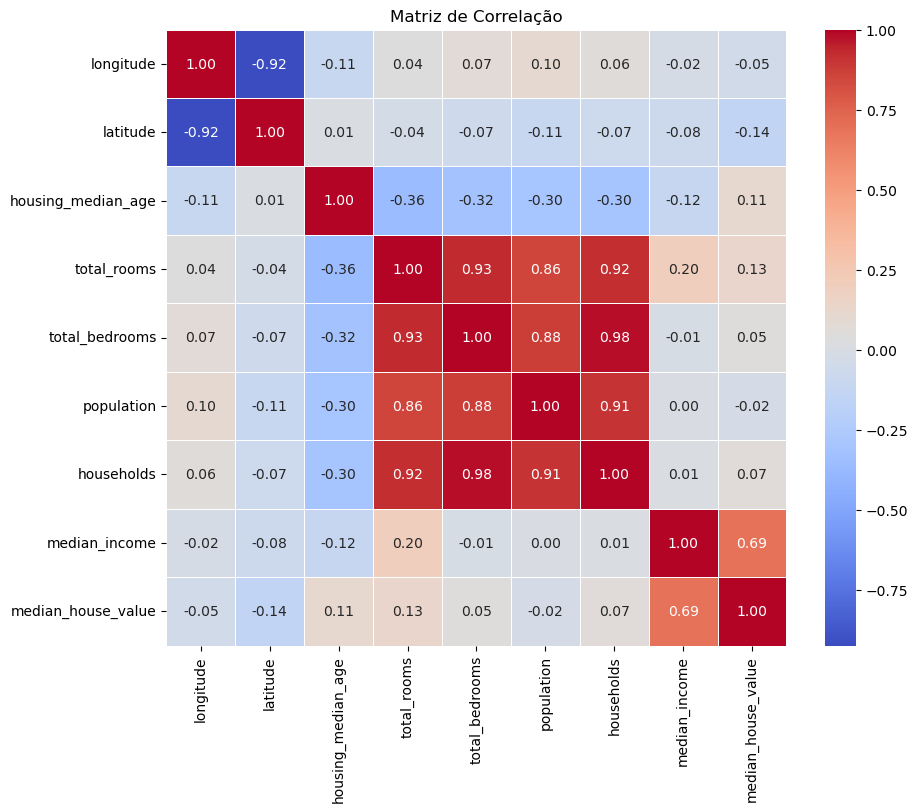

In [13]:
# Visualização da matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
median_income é a variável com maior potencial preditivo para o valor das casas e deve ser considerada com prioridade na modelagem

### 3. Separe os dados em validação e teste

In [14]:
# Separar variáveis preditoras (X) e alvo (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Separar entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # 30% dos dados para teste
    random_state=42 # para reprodutibilidade
)

print(f'Tamanho do conjunto de treino: {X_train.shape}')
print(f'Tamanho do conjunto de teste: {X_test.shape}')

Tamanho do conjunto de treino: (14448, 9)
Tamanho do conjunto de teste: (6192, 9)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Separar features e target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Transformar variáveis categóricas com One-Hot Encoding
X = pd.get_dummies(X)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar árvore com profundidade 8
arvore_profunda = DecisionTreeRegressor(max_depth=8, random_state=42)
arvore_profunda.fit(X_train, y_train)

# Treinar árvore com profundidade 2
arvore_rasa = DecisionTreeRegressor(max_depth=2, random_state=42)
arvore_rasa.fit(X_train, y_train)

print("Modelos treinados com sucesso!")

Modelos treinados com sucesso!


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [19]:
from sklearn.metrics import mean_squared_error

# Previsões
y_pred_train_profunda = arvore_profunda.predict(X_train)
y_pred_test_profunda = arvore_profunda.predict(X_test)

y_pred_train_rasa = arvore_rasa.predict(X_train)
y_pred_test_rasa = arvore_rasa.predict(X_test)

# Cálculo do MSE
mse_train_profunda = mean_squared_error(y_train, y_pred_train_profunda)
mse_test_profunda = mean_squared_error(y_test, y_pred_test_profunda)

mse_train_rasa = mean_squared_error(y_train, y_pred_train_rasa)
mse_test_rasa = mean_squared_error(y_test, y_pred_test_rasa)

# Exibir os resultados
print("Árvore Profunda (max_depth=8)")
print(f"  MSE Treinamento: {mse_train_profunda:.2f}")
print(f"  MSE Teste:       {mse_test_profunda:.2f}")

print("\nÁrvore Rasa (max_depth=2)")
print(f"  MSE Treinamento: {mse_train_rasa:.2f}")
print(f"  MSE Teste:       {mse_test_rasa:.2f}")

Árvore Profunda (max_depth=8)
  MSE Treinamento: 3253976845.99
  MSE Teste:       3904405786.79

Árvore Rasa (max_depth=2)
  MSE Treinamento: 6710572662.34
  MSE Teste:       6893607949.70


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [ ]:
A árvore com profundidade 8 é claramente mais eficiente neste caso, com menor erro tanto no treino quanto no teste. Isso indica que ela pode ser uma boa base para modelagem preditiva com esses dados.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

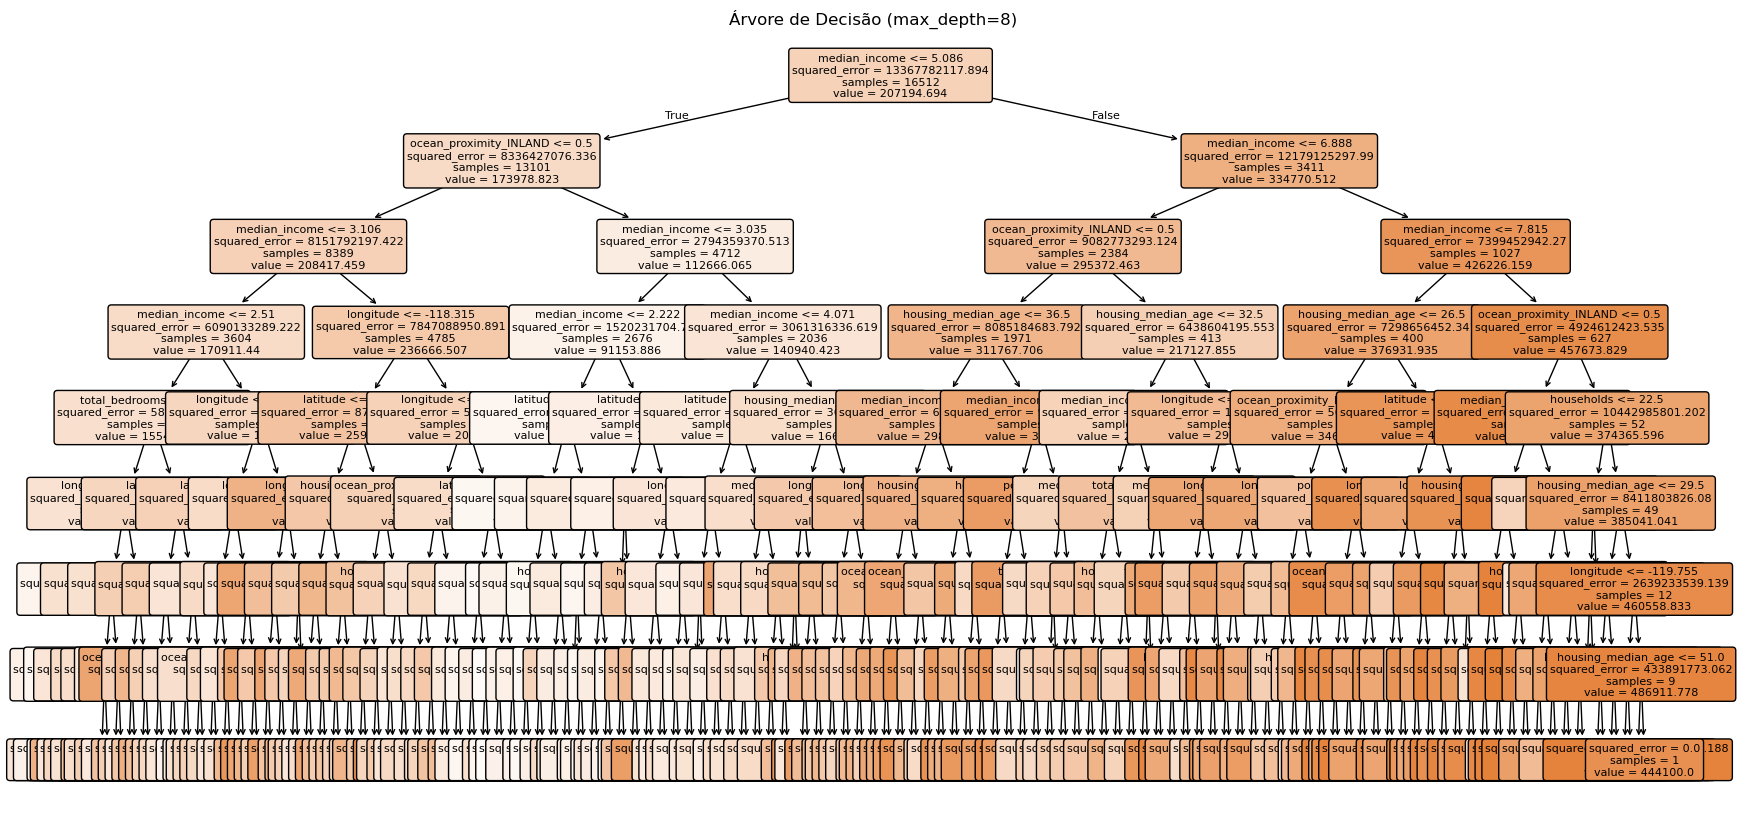

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar a árvore profunda (max_depth=8)
plt.figure(figsize=(20, 10))
plot_tree(arvore_profunda, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          fontsize=8)
plt.title("Árvore de Decisão (max_depth=8)")
plt.show()

In [ ]:
A variável "renda média domiciliar" aparece como o primeiro nó da árvore — isso sugere que ela é a mais importante para prever o median_house_value